## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  62.331772  1168.081745  0.517250   6.391810  607.204363
1  16.112647  1233.726602  0.041888  10.920628   54.292543
2  52.611929   261.530210  0.927129   5.836069  248.116504
3  16.382969   996.335270  0.276457  10.525323  276.042695
4  59.375578   278.011407  0.512884   3.624179  154.681259


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9521584	total: 57.2ms	remaining: 57.1s
1:	learn: 0.9398559	total: 58ms	remaining: 29s
2:	learn: 0.9289249	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9163846	total: 59ms	remaining: 14.7s
4:	learn: 0.9046610	total: 59.7ms	remaining: 11.9s
5:	learn: 0.8934857	total: 60.1ms	remaining: 9.96s
6:	learn: 0.8827928	total: 60.6ms	remaining: 8.59s
7:	learn: 0.8710227	total: 61.2ms	remaining: 7.59s
8:	learn: 0.8584901	total: 61.6ms	remaining: 6.79s
9:	learn: 0.8471709	total: 62.1ms	remaining: 6.14s
10:	learn: 0.8381489	total: 62.5ms	remaining: 5.62s
11:	learn: 0.8249450	total: 63ms	remaining: 5.19s
12:	learn: 0.8130511	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8016109	total: 64.9ms	remaining: 4.57s
14:	learn: 0.7903895	total: 65.2ms	remaining: 4.28s
15:	learn: 0.7807058	total: 65.6ms	remaining: 4.03s
16:	learn: 0.7718102	total: 66ms	remaining: 3.82s
17:	learn: 0.7612393	total: 66.5ms	remaining: 3.63s
18:	learn: 0.7541009	total: 66.9ms	remaining: 3.45s
19

94:	learn: 0.3176343	total: 103ms	remaining: 979ms
95:	learn: 0.3142912	total: 103ms	remaining: 973ms
96:	learn: 0.3113681	total: 104ms	remaining: 966ms
97:	learn: 0.3082406	total: 104ms	remaining: 958ms
98:	learn: 0.3044566	total: 104ms	remaining: 950ms
99:	learn: 0.3014505	total: 105ms	remaining: 945ms
100:	learn: 0.2990898	total: 105ms	remaining: 938ms
101:	learn: 0.2965290	total: 106ms	remaining: 931ms
102:	learn: 0.2933667	total: 106ms	remaining: 924ms
103:	learn: 0.2913169	total: 107ms	remaining: 918ms
104:	learn: 0.2885653	total: 107ms	remaining: 912ms
105:	learn: 0.2854306	total: 107ms	remaining: 906ms
106:	learn: 0.2826786	total: 108ms	remaining: 901ms
107:	learn: 0.2793570	total: 108ms	remaining: 895ms
108:	learn: 0.2769705	total: 110ms	remaining: 896ms
109:	learn: 0.2746570	total: 110ms	remaining: 890ms
110:	learn: 0.2727499	total: 110ms	remaining: 883ms
111:	learn: 0.2704693	total: 111ms	remaining: 877ms
112:	learn: 0.2680550	total: 111ms	remaining: 871ms
113:	learn: 0.2650

280:	learn: 0.0754784	total: 185ms	remaining: 472ms
281:	learn: 0.0751087	total: 185ms	remaining: 471ms
282:	learn: 0.0747082	total: 186ms	remaining: 470ms
283:	learn: 0.0743082	total: 186ms	remaining: 470ms
284:	learn: 0.0738767	total: 187ms	remaining: 468ms
285:	learn: 0.0734564	total: 187ms	remaining: 467ms
286:	learn: 0.0730393	total: 187ms	remaining: 466ms
287:	learn: 0.0726209	total: 188ms	remaining: 465ms
288:	learn: 0.0722470	total: 188ms	remaining: 463ms
289:	learn: 0.0718552	total: 189ms	remaining: 462ms
290:	learn: 0.0714743	total: 189ms	remaining: 461ms
291:	learn: 0.0709976	total: 189ms	remaining: 459ms
292:	learn: 0.0705422	total: 190ms	remaining: 458ms
293:	learn: 0.0700790	total: 190ms	remaining: 456ms
294:	learn: 0.0697132	total: 190ms	remaining: 455ms
295:	learn: 0.0693376	total: 191ms	remaining: 453ms
296:	learn: 0.0689807	total: 191ms	remaining: 452ms
297:	learn: 0.0685967	total: 191ms	remaining: 450ms
298:	learn: 0.0682136	total: 192ms	remaining: 449ms
299:	learn: 

517:	learn: 0.0238387	total: 283ms	remaining: 264ms
518:	learn: 0.0237557	total: 284ms	remaining: 263ms
519:	learn: 0.0236486	total: 284ms	remaining: 262ms
520:	learn: 0.0235670	total: 285ms	remaining: 262ms
521:	learn: 0.0234662	total: 285ms	remaining: 261ms
522:	learn: 0.0233878	total: 286ms	remaining: 261ms
523:	learn: 0.0232889	total: 286ms	remaining: 260ms
524:	learn: 0.0232110	total: 286ms	remaining: 259ms
525:	learn: 0.0231139	total: 287ms	remaining: 259ms
526:	learn: 0.0230364	total: 287ms	remaining: 258ms
527:	learn: 0.0229424	total: 288ms	remaining: 257ms
528:	learn: 0.0228671	total: 288ms	remaining: 257ms
529:	learn: 0.0227935	total: 289ms	remaining: 256ms
530:	learn: 0.0226990	total: 289ms	remaining: 255ms
531:	learn: 0.0226267	total: 289ms	remaining: 255ms
532:	learn: 0.0225339	total: 290ms	remaining: 254ms
533:	learn: 0.0224423	total: 290ms	remaining: 253ms
534:	learn: 0.0223334	total: 291ms	remaining: 253ms
535:	learn: 0.0222318	total: 291ms	remaining: 252ms
536:	learn: 

709:	learn: 0.0115599	total: 366ms	remaining: 149ms
710:	learn: 0.0115073	total: 366ms	remaining: 149ms
711:	learn: 0.0114640	total: 367ms	remaining: 148ms
712:	learn: 0.0114168	total: 367ms	remaining: 148ms
713:	learn: 0.0113914	total: 368ms	remaining: 147ms
714:	learn: 0.0113368	total: 368ms	remaining: 147ms
715:	learn: 0.0112719	total: 368ms	remaining: 146ms
716:	learn: 0.0112335	total: 369ms	remaining: 146ms
717:	learn: 0.0111706	total: 369ms	remaining: 145ms
718:	learn: 0.0111399	total: 370ms	remaining: 145ms
719:	learn: 0.0110789	total: 370ms	remaining: 144ms
720:	learn: 0.0110489	total: 371ms	remaining: 143ms
721:	learn: 0.0109929	total: 371ms	remaining: 143ms
722:	learn: 0.0109379	total: 372ms	remaining: 142ms
723:	learn: 0.0108781	total: 372ms	remaining: 142ms
724:	learn: 0.0108253	total: 372ms	remaining: 141ms
725:	learn: 0.0108008	total: 373ms	remaining: 141ms
726:	learn: 0.0107767	total: 373ms	remaining: 140ms
727:	learn: 0.0107368	total: 373ms	remaining: 140ms
728:	learn: 

930:	learn: 0.0054012	total: 467ms	remaining: 34.6ms
931:	learn: 0.0053907	total: 468ms	remaining: 34.1ms
932:	learn: 0.0053723	total: 468ms	remaining: 33.6ms
933:	learn: 0.0053532	total: 468ms	remaining: 33.1ms
934:	learn: 0.0053373	total: 469ms	remaining: 32.6ms
935:	learn: 0.0053219	total: 469ms	remaining: 32.1ms
936:	learn: 0.0053069	total: 470ms	remaining: 31.6ms
937:	learn: 0.0052990	total: 471ms	remaining: 31.1ms
938:	learn: 0.0052841	total: 471ms	remaining: 30.6ms
939:	learn: 0.0052695	total: 472ms	remaining: 30.1ms
940:	learn: 0.0052440	total: 472ms	remaining: 29.6ms
941:	learn: 0.0052296	total: 473ms	remaining: 29.1ms
942:	learn: 0.0052165	total: 473ms	remaining: 28.6ms
943:	learn: 0.0052071	total: 473ms	remaining: 28.1ms
944:	learn: 0.0051845	total: 473ms	remaining: 27.6ms
945:	learn: 0.0051701	total: 474ms	remaining: 27.1ms
946:	learn: 0.0051601	total: 474ms	remaining: 26.5ms
947:	learn: 0.0051355	total: 475ms	remaining: 26ms
948:	learn: 0.0051214	total: 475ms	remaining: 25

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

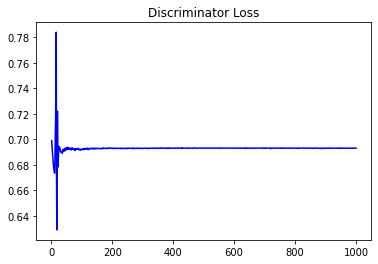

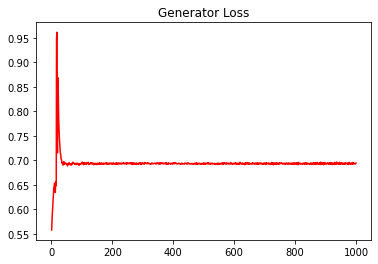

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.012406931413044784


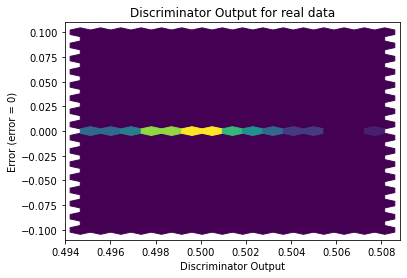

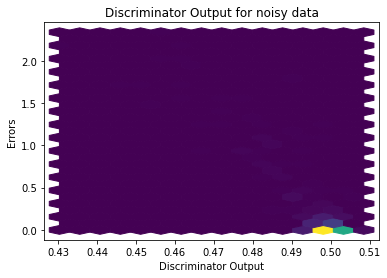

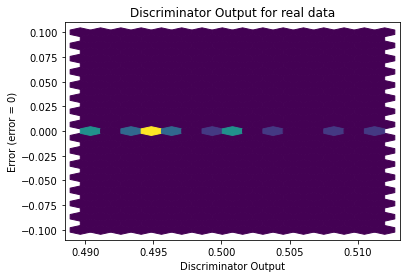

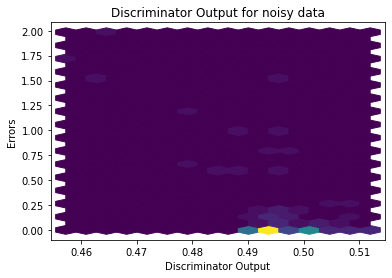

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


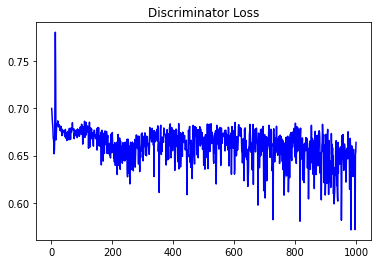

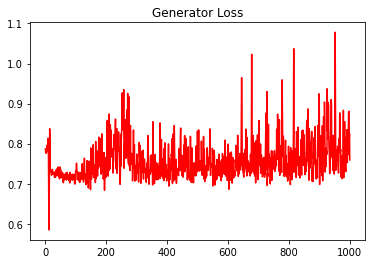

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0032497228628288193


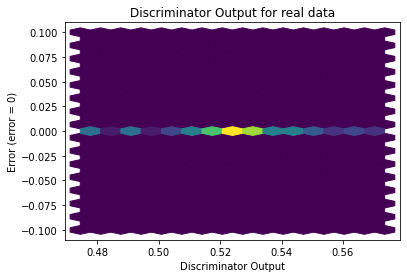

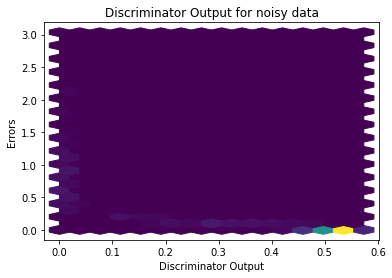

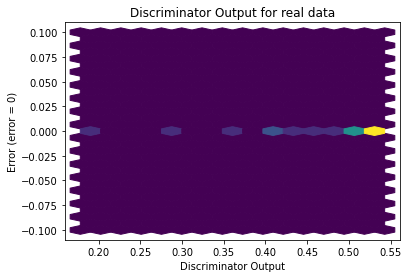

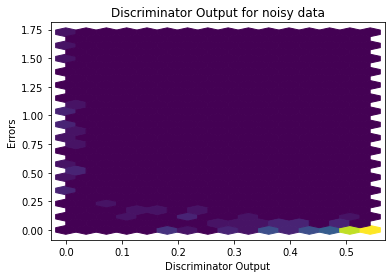

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1190]], requires_grad=True)
